In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


(-0.5, 63.5, 63.5, -0.5)

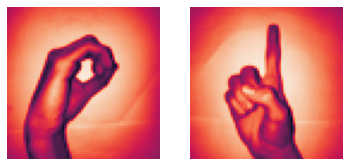

In [38]:

X = np.load('/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy') # Numpy datasets
y = np.load("/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy")
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(X[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X[900].reshape(img_size, img_size))
plt.axis('off')

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [40]:
image_size = 64

y = np.argmax(y, axis=1)
print('New Y Shape : ',y.shape)

New Y Shape :  (2062,)


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=1)

In [42]:
inputs = tf.keras.Input(shape=(64,64,1))

conv1 = tf.keras.layers.Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu')(inputs)
pool1 = tf.keras.layers.MaxPool2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu')(pool1)
pool2 = tf.keras.layers.MaxPool2D()(conv2)

flatten = tf.keras.layers.Flatten()(pool2)
dense1  = tf.keras.layers.Dense(units=120, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84, activation='relu')(dense1)
output = tf.keras.layers.Dense(units = 10, activation = 'softmax')(dense2)

model = tf.keras.Model(inputs = inputs, outputs = output)
print(model.summary())


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 6)         156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               3246

In [43]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [44]:


history = model.fit(
    x_train,
    y_train,
    validation_split=0.8,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
9/9 [==============================] - 2s 128ms/step - loss: 2.3213 - accuracy: 0.0955 - val_loss: 2.2899 - val_accuracy: 0.1723
Epoch 2/100
9/9 [==============================] - 1s 105ms/step - loss: 2.2700 - accuracy: 0.2277 - val_loss: 2.2423 - val_accuracy: 0.1385
Epoch 3/100
9/9 [==============================] - 1s 88ms/step - loss: 2.1787 - accuracy: 0.1671 - val_loss: 2.1390 - val_accuracy: 0.3299
Epoch 4/100
9/9 [==============================] - 1s 90ms/step - loss: 2.0294 - accuracy: 0.4026 - val_loss: 1.9059 - val_accuracy: 0.3844
Epoch 5/100
9/9 [==============================] - 1s 91ms/step - loss: 1.7199 - accuracy: 0.5335 - val_loss: 1.6095 - val_accuracy: 0.5186
Epoch 6/100
9/9 [==============================] - 1s 90ms/step - loss: 1.3582 - accuracy: 0.6517 - val_loss: 1.5553 - val_accuracy: 0.4519
Epoch 7/100
9/9 [==============================] - 1s 86ms/step - loss: 1.0427 - accuracy: 0.6996 - val_loss: 1.3069 - val_accuracy: 0.5506
Epoch 8/100
9/9 [=

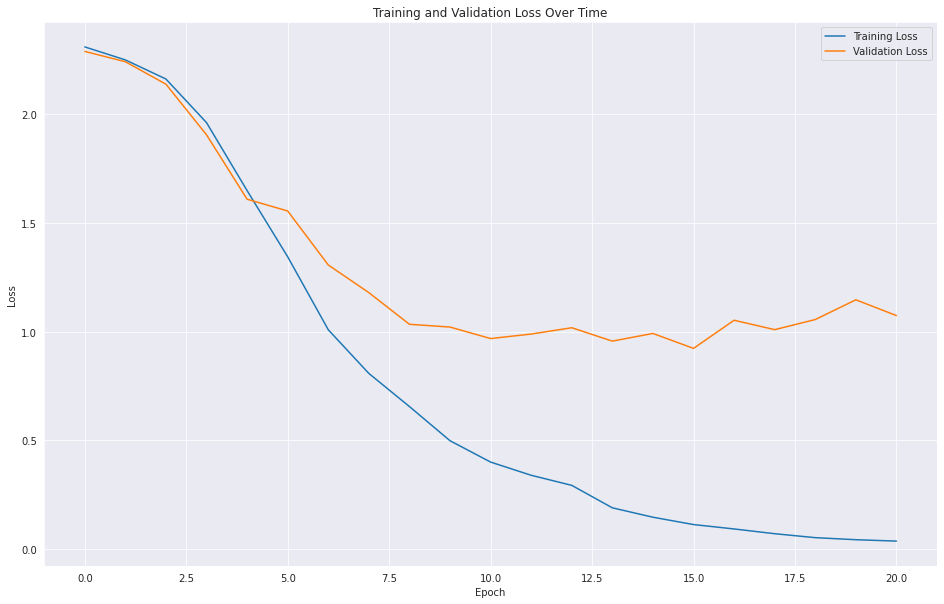

In [45]:
plt.figure(figsize=(16, 10))

epochs_range = range(len(history.history['loss']))

plt.plot(epochs_range, history.history['loss'], label="Training Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

In [49]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Test Loss: 1.02281
Test Accuracy: 72.54%


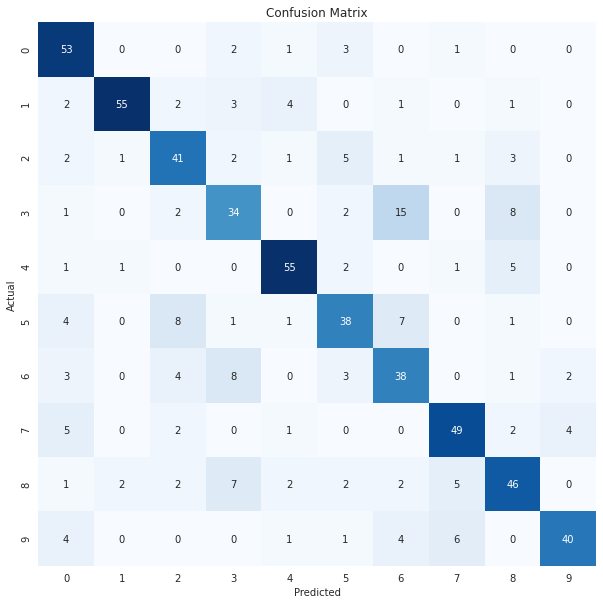

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        60
           1       0.93      0.81      0.87        68
           2       0.67      0.72      0.69        57
           3       0.60      0.55      0.57        62
           4       0.83      0.85      0.84        65
           5       0.68      0.63      0.66        60
           6       0.56      0.64      0.60        59
           7       0.78      0.78      0.78        63
           8       0.69      0.67      0.68        69
           9       0.87      0.71      0.78        56

    accuracy                           0.73       619
   macro avg       0.73      0.72      0.72       619
weighted avg       0.73      0.73      0.73       619



In [50]:
evaluate_model(model, x_test, y_test)